In [22]:
import os
import tarfile
from six.moves import urllib

import pandas as pd

import matplotlib.pyplot as plt

In [7]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_FILENAME = "housing.tgz"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/" + HOUSING_FILENAME

In [10]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, HOUSING_FILENAME)
    urllib.request.urlretrieve(housing_url, tgz_path)
    tgz = tarfile.open(tgz_path)
    tgz.extractall(path=housing_path)
    tgz.close()

In [11]:
fetch_housing_data()

In [12]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [15]:
housing_df = load_housing_data()

In [16]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
len(housing_df)

20640

In [19]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
%matplotlib inline

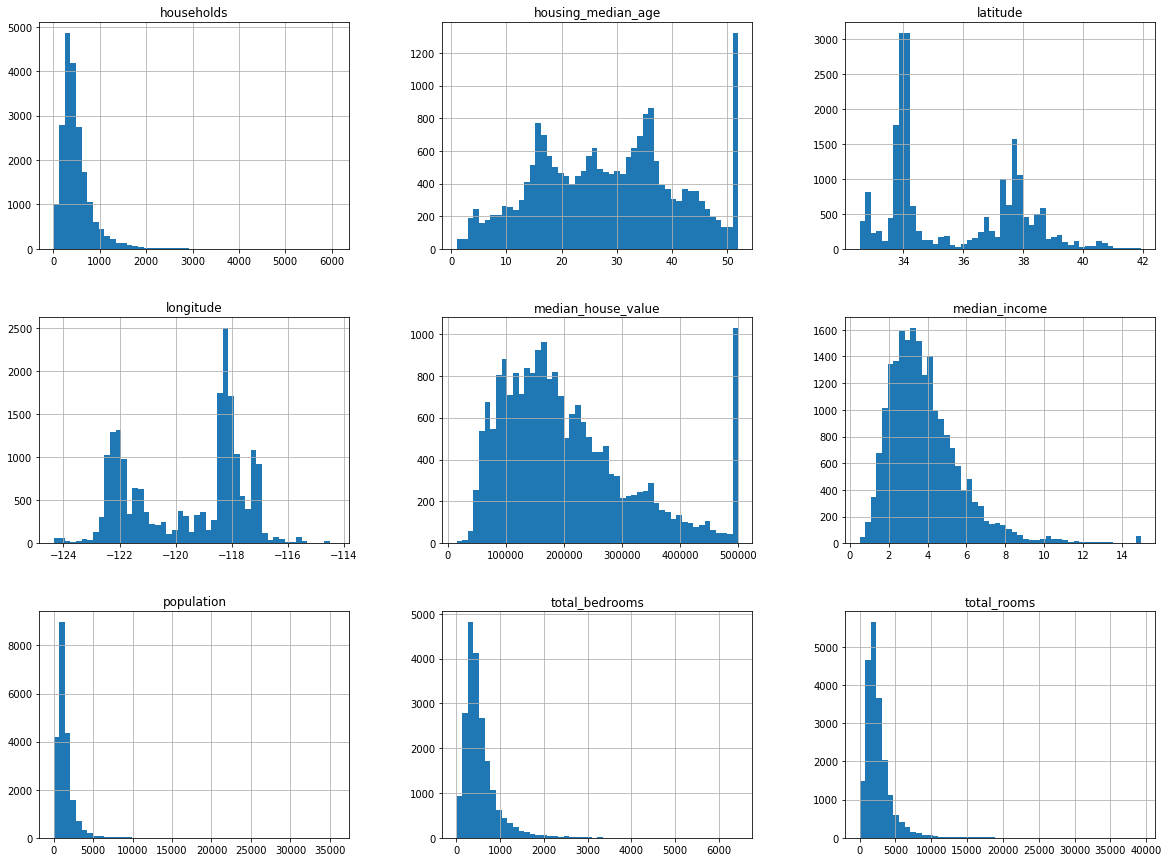

In [24]:
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

## Create a Test Set

In [25]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [26]:
train_set, test_set = split_train_test(housing_df, 0.2)

In [29]:
print("Training set size: {}, test set size: {}".format(len(train_set), len(test_set)))

Training set size: 16512, test set size: 4128


> It works, but it's not perfect - every time I rerun the code it will get a different set of train and test data, so the ML alg has a chance to see the whole data set(and as a result - overfit)

Solutions: 
1. Save the train and test sets into disk as separate files
2. Seed random generator - `np.random.seed(42)`, before calling `np.random.permutation`

Both solutions above will break next time we fetch and updated dataset. 

Other option would be to use instance identifier(assuming each row has a unique and immutable ID) to decide whether or not it should go in the test set. For example, we can compute a hash of each identifier and use last byte of the hash and put the instance in the test set if this value is lower or equal to 51(~20% of 256)

The Housing data doesn't have unique ID, we can use row index or some stable feature from the dataset(e.g. longtitude and latitude).

Scikit-Learn provides a few functions:
* `train_test_split` - almost the same as `split_train_test`, but also has `random_state` arg to set the random generator seed and also allows splitting multiple datasets of the same length(usefull if features and labels are separate DataFrames):
```
from sklearn.mode_selection imort train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)
```

Purely random sampling methods are file if a dataset is large enough, but if it's not there is a risk of inroducing a significant sampling bias. The better solutions would be to use *stratified sampling*: the population is divided into homogeneous subgroups called *strata*, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. 

If we want unbiased test and train datasets for and important attribute `median_income` we first need to build categories of and income:

In [31]:
housing_df["income_cat"] = np.ceil(housing["median_income"] / 1.5) # Divide income by 1.5 and round up using ceil - create discreete income categories
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True) # For all income_cat >= 5, set income_cat to 5.0.

In [32]:
housing_df["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [71]:
train_set, test_set = split_train_test(housing_df, 0.2)

### Stratified sampling

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [60]:
print("Train Set len: {}, Test Set len: {}".format(len(strat_train_set), len(strat_test_set)))

Train Set len: 16512, Test Set len: 4128


In [53]:
housing_df["income_cat"].value_counts() / len(housing_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [73]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [75]:
for s in (strat_train_set, strat_test_set):
    s.drop(["income_cat"], axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [76]:
housing = strat_train_set.copy()

In [77]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


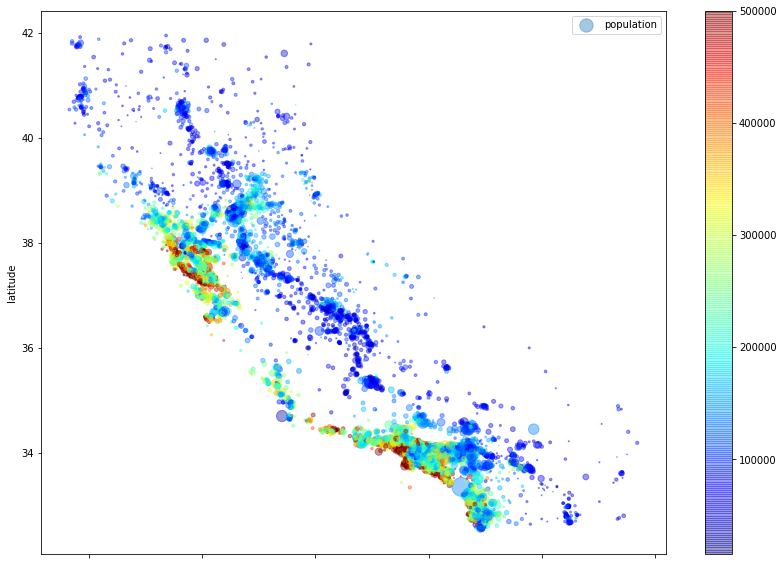

In [96]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             c=housing['median_house_value'],
             s=housing['population']/100, label='population',
             cmap=plt.get_cmap('jet'),
             alpha=0.4,
             figsize=(14, 10)
            )
plt.legend()
plt.show()

### Standard correlation coefficient(Pearson's r) and scatter_matrix

In [97]:
corr_matrix = housing.corr()

In [98]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [99]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [101]:
from pandas.plotting import scatter_matrix

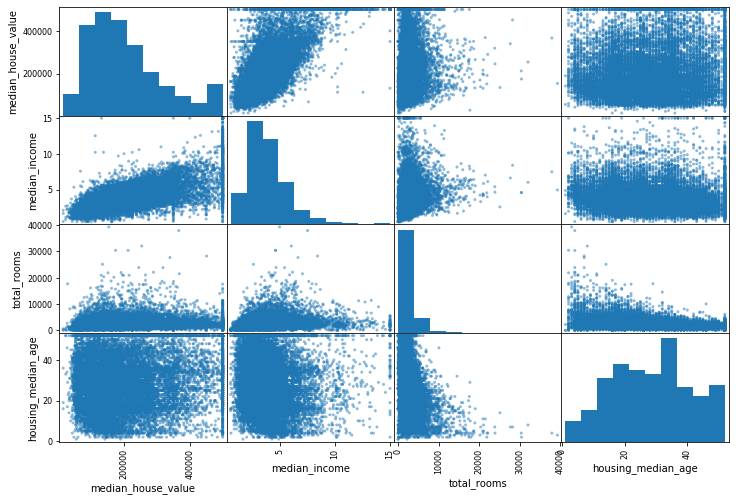

In [106]:
attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

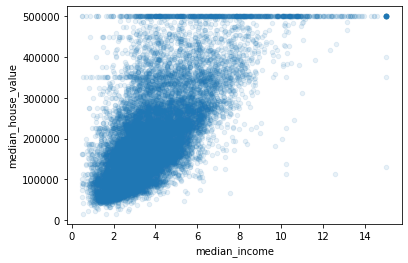

In [109]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## Creating new attributes

In [110]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [114]:
housing["rooms_per_household"] = housing['total_rooms'] / housing['households']
housing["bedrooms_per_room"] = housing['total_bedrooms'] / housing['total_rooms']
housing["population_per_household"] = housing['population'] / housing['households']

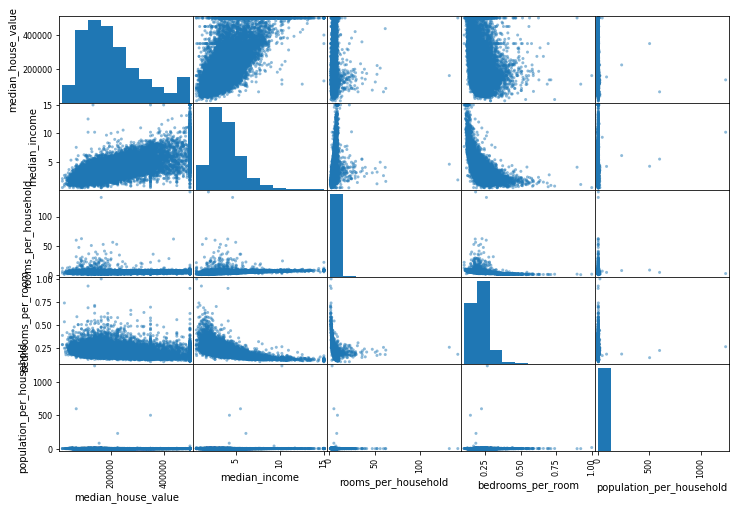

In [115]:
attributes=['median_house_value', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

`bedrooms_per_room` seems like an interesting feature to have. Correlate with `median_income` and `median_house_value`

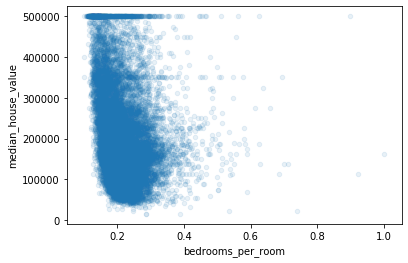

In [116]:
housing.plot(kind="scatter", x='bedrooms_per_room', y='median_house_value', alpha=0.1)
plt.show()

In [119]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
rooms_per_house             0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

`rooms_per_household` is also an interesting feature to have

## Preparing data for ML Algorithms